## EE 242 Lab 4a – Digital Filtering - Various Filters

Author names go here 

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
import signal

# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, we will consider different types of digital filters (specifically discrete-time, linear, time-invariant filters) and look at their characterization in both time and frequency. This will give you some insight into how digital filters are implemented and into the properties of different digital filter design algorithms. You’ll also learn about some of the signal processing functions available from the signal module in the scipy package which will be useful for designing and implement filters.  You will work with examples that show you how filtering can be useful to remove noise and reshape the frequency content of a signal. Specifically, we’ll revisit the lab 2 problem of removing noise from signals (or smoothing signals), then explore filter design methods, and finally implement a simple audio equalizer. This is a 2-week lab. It is recommended to work on the first 2 assignments in the first week and the remaining 
assignments in the second week. 

## Lab 4a turn in checklist

•	Lab 4a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)

## Assignment 1 -- Different Filter Implementations

In this lab, we will be using standard tools to design filters, and we’ll want to view them in both the time and frequency domain. In this assignment, you will write and test functions for plotting the frequency response and the impulse response of a system given the filter coefficients {a, b}. This assignment will have three parts, A-C.

**A.** The response that is most often illustrated is the magnitude frequency response on a dB scale. Write a function that takes as input the filter coefficients, an optional flag for plotting both the magnitude and phase of the frequency response, and an optional sampling frequency. The function should generate either a plot of the magnitude or both the magnitude and the phase side-by-side, depending on the flag, with the default being magnitude only. The magnitude of the frequency response should be plotted on a dB scale with a range of [-100,0].  If no sampling frequency is provided, use radians for the frequency axis; otherwise use a Hz scale. 

**B.**  Write a second function that takes as input the filter coefficients and a desired impulse response length, computes and returns the impulse response, and also plots the impulse response using a stem plot.

**C.**  Test the functions by plotting the magnitude, phase and impulse responses of two lowpass filters with a frequency cut-off of 0.15. One should be an FIR filter designed using the signal.firwin function (order 20) and the other should be an IIR filter with the signal.butter function (order 10).


<IPython.core.display.Javascript object>


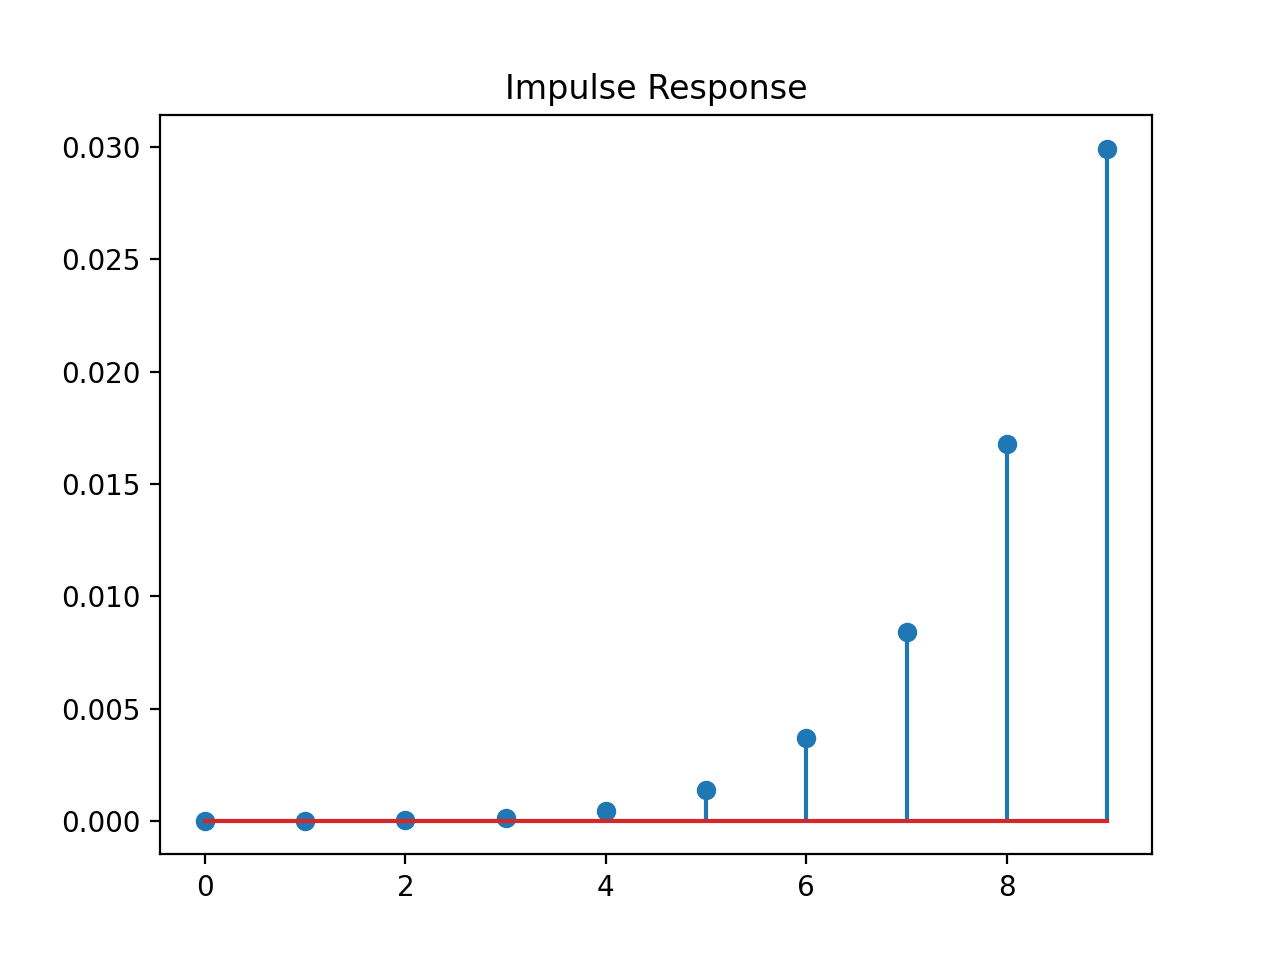

array([1.38467082e-07, 2.35247509e-06, 1.95824370e-05, 1.06901175e-04,
       4.32302231e-04, 1.38698034e-03, 3.69159512e-03, 8.41210571e-03,
       1.67983303e-02, 2.99203978e-02])

In [7]:
# Assignment 1 - Different Filter Implementations

# Part A

def plot_mag_freq_response(b, a, plot_phase = 0, fs = 0):
    # plot_phase and fs are 0 by default, feel free to change the default values
    # If plot_phase is 0, do not plot the phase response, else plot the phase response
    # If fs is 0, the x axis would be in radians, otherwise it would be in Hz based on the sampling frequency provided
    # Use signal.freqz to get your frequency response 
    
    w, hf = sig.freqz(b, a)
    
    unit = '(Rad)'
    if fs != 0:
        f = w * fs/(2*np.pi)
        unit = '(Hz)'
    else:
        f = w
    plt.subplot(1, 2, 1)
    plt.title('Magnitude of Frequency Response')
    plt.plot(w, 20 * np.log10(np.abs(hf)))
    plt.ylim([-100,0])
    plt.ylabel('Magnitude (dB)')
    plt.xlabel('Frequency ' + unit)
    if plot_phase != 0:
        plt.subplot(1, 2, 2)
        plt.title('Phase of Frequency Response')
        plt.plot(f, np.rad2deg(np.unwrap(np.angle(hf))))
        plt.ylabel('Phase (Rad)')
        plt.xlabel('Frequency ' + unit) 
    plt.tight_layout()
    return w, hf

# Part B
# Hint: Use signal.lfilter 
# B. Write a second function that takes as input the filter coefficients and 
# a desired impulse response length, computes and returns the impulse response, 
# and also plots the impulse response using a stem plot.

def impulse_response(b, a, implength):
    
    x = np.concatenate((np.ones(1), np.zeros(implength - 1)))
    
    axis = np.arange(implength)
    ht = sig.lfilter(b,a,x)
    
    plt.subplot(1, 1, 1)
    plt.stem(axis, ht)
    plt.title('Impulse Response')
    return ht

# Part C
# Use signal.firwin and signal.butter

order = 20
W = 0.15 # cutoff frequency 
b1 = sig.firwin(order, W)
a1 = [1]

order2 = 10
b2, a2 = sig.butter(order2, W, 'lowpass')

plot_mag_freq_response(b1, a1, 1, 1)
impulse_response(b1, a1, order)

plot_mag_freq_response(b2, a2, 1, 1)
impulse_response(b2, a2, order2)





###  Discussion

 Comment on the differences between the two filters in terms of the magnitude, phase and impulse responses.  What are the tradeoffs associated with these differences? 
 
The Firwin filter acts as a low pass filter, only allowing frequencies with a magnitude of 100 dB or less. However, the filter also allows in harmonics in the higher frequencies, spaced at equal intervals. The Impulse response of the Firwin filter is similar to a truncated gaussian, and thus it leaves a very stable low frequency window after convolving with the original signal.

The Butterworth filter is also a lowpass filter, but the cutoff is much more drastic, no frequencies above 1.1 are allowed to pass. The impulse response of the Butterworth filter is a full gaussian, causing the cutoff to take the form of a Z-curve. 

A Firwin filter would probably be better suited for filtering full audio signals, whereas a butterworth filter would be good for splicing signals of differing ranges.

## Assignment 2 -- Different Filter Implementations for Smoothing Signals 

In lab 2A, assignment 2, you experimented with smoothing a noisy signal using a moving average window and a convolution. The convolution used an impulse response h[n] that was a causal version of the moving average window. In this problem, you will implement the smoothing function using the both convolution and the signal.lfilter command, to see that they give the same result. This assignment will have three parts, A-C.


**A.**  Using the code from lab 2, create a base time signal and a noisy version of it by adding random noise generated with the numpy.random.randn() function (the standard normal distribution, which is zero mean and unit variance). Plot the original and noisy signals together with the original overlaid on the noisy version, with the time axis labeled assuming a sampling rate of 1000 Hz. Constrain the y-axis to be [0,25] for all plots. Include a legend with the plot.

**B.**  Create one smoothed version of the signal called filtsig1 by using the convolve function from lab 2 with the box impulse response and k=10. Create a second version called filtsig2 by using the signal.lfilter function. Recall that for the FIR filter, the impulse response is equal to the b coefficient vector. Plot the two filtered signals overlaid. Recall that the convolve function will change the length, so you will need to define a new time vector for that. You should find that the two methods give the same result except for edge effects.

**C.**  Use the function that you wrote in assignment 1 to plot the magnitude and phase for the frequency response of this filter. It should look like a low pass filter.


<IPython.core.display.Javascript object>


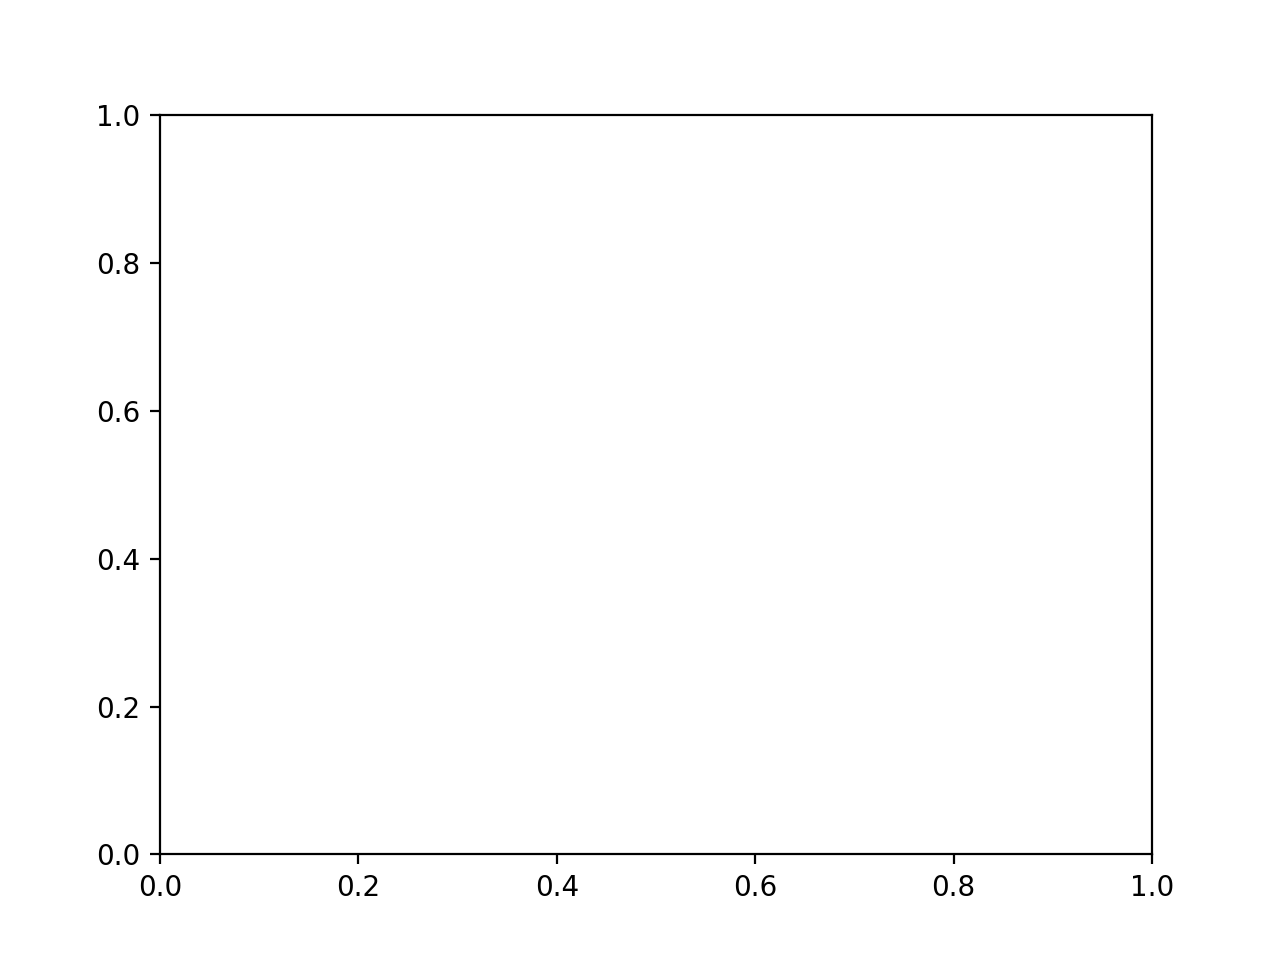

AttributeError: 'tuple' object has no attribute 'set_title'

In [23]:
# Assignment 2 - Different Filter Implementations for Smoothing Signals

# Part A
# Base and noise signal from lab 2
p     = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
sr  = 1000 # sample rate of base signal
time  = np.arange(0,2,1/sr)
n = len(time)
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

x_ax = np.arange(0, 2000, 1,dtype=int)

# create some random noise to be added to the abve base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

noisysig = np.add(noise, base)

fig = plt.subplots(1)

fig.set_title('Noiseless vs. Noisy Signals @ 1000Hz SR')
fig.plot(x_ax, base)
fig.plot(x_ax, noisysig)
fig.set_xlim([0, 2000])
fig.set_ylim([0,25])
                    


# Part B
# Use signal.lfilter to apply your filter

# Part C

###  Discussion

The moving window average (and its causal version) is an FIR filter, so the phase should be linear. How might the result change if you used a Butterworth filter?